# RFP: Targeted Taco Bell Ads

## Project Overview
You are invited to submit a proposal that answers the following question:

### What ad will you create and why?

*Please submit your proposal by **1/30/25 at 11:59 PM**.*

## Required Proposal Components

### 1. Data Description
In the code cell below, read in the data you will need to train and test your model. Call `info()` once you have read the data into a dataframe. Consider using some or all of the following sources:
- [Customer Demographics](https://drive.google.com/file/d/1HK42Oa3bhhRDWR1y1wVBDAQ2tbNwg1gS/view?usp=sharing)
- [Ad Response Data](https://drive.google.com/file/d/1cuLqXPNKhP66m5BP9BAlci2G--Vopt-Z/view?usp=sharing)

*Note, a level 5 dataset combines these two data sets.*

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load datasets
ad_df = pd.read_csv("ad_data.csv")
customer_df = pd.read_csv("customer_data.csv")


### 2. Training Your Model
In the cell seen below, write the code you need to train a K-means clustering model. Make sure you describe the center of each cluster found.

*Note, level 5 work uses at least 3 features to train a K-means model using only the standard Python library and Pandas. A level 4 uses external libraries like scikit or numpy.*

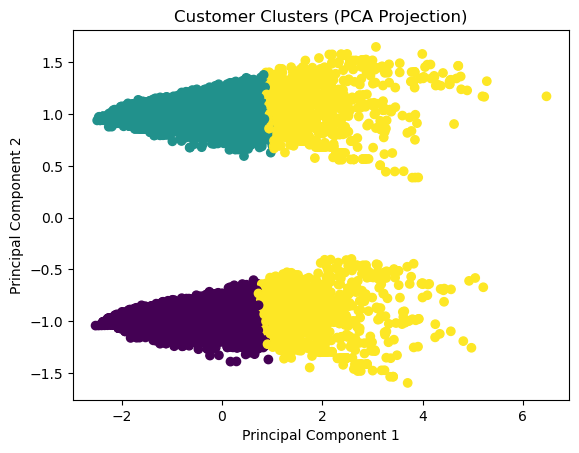

In [2]:
# Preprocess the ad dataset
ad_df['num_items_purchased'] = ad_df['items_purchased'].apply(lambda x: len(eval(x)))
ad_df['num_drinks_purchased'] = ad_df['drinks_purchased'].apply(lambda x: len(eval(x)))
ad_features = ad_df[['ad_response', 'num_items_purchased', 'num_drinks_purchased']].astype(int)

ad_scaled = StandardScaler().fit_transform(ad_features)
kmeans_ad = KMeans(n_clusters=3, random_state=42).fit(ad_scaled)
ad_df['deal_cluster'] = kmeans_ad.labels_

# Preprocess the customer dataset
customer_df['sex'] = customer_df['sex'].apply(lambda x: 1 if x == 'F' else 0)
customer_features = customer_df[['income', 'sex', 'age', 'family_size']]

customer_scaled = StandardScaler().fit_transform(customer_features)
kmeans_customer = KMeans(n_clusters=3, random_state=42).fit(customer_scaled)
customer_df['customer_cluster'] = kmeans_customer.labels_

# Visualize the customer clusters using PCA
pca = PCA(n_components=2)
customer_pca = pca.fit_transform(customer_scaled)

plt.scatter(customer_pca[:, 0], customer_pca[:, 1], c=kmeans_customer.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Clusters (PCA Projection)')
plt.show()


#### Don't forget to describe the centers of the clusters you found.

### 3. Testing Your Model
In the cell seen below, write the code you need to test your K-means model. Then, interpret your findings.

*Note, level 5 testing uses both an elbow plot and a silhouette score to evaluate your model. Level 4 uses one or the other.*

In [2]:
# Test model here.

#### Interpret your elbow plot and/or silhouette score here.

### 4. Final Answer

In the first cell seen below, describe the cluster you have chosen to target with your ad, making sure to describe the type of ad they were the most likely to respond to. Then, use software of your choosing to create the ad you will need to target this cluster. You do not need to create an ad for both the nacho fries and the Baja Blast. You can focus on one if that's what your cluster cares about most.

In the second cell seen below, include a link to your ad.

*Note, a level 5 ad uses the medium (static image or video) the cluster most likely responded to.* 

#### Describe the cluster you are targeting here.

#### Link your ad here.